# load packages

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# load datasets

In [2]:
def parser(x):
    return datetime.datetime.strptime(x,'%Y%m%d')

## three financial sheets

In [3]:
income=pd.read_csv(r'C:\Users\ness\OneDrive\data\statpj\income1.csv',parse_dates=['ann_date','f_ann_date','end_date'
],date_parser=parser)

In [4]:
balance=pd.read_csv(r'C:\Users\ness\OneDrive\data\statpj\bs1.csv',low_memory=False,parse_dates=['ann_date','f_ann_date','end_date'
],date_parser=parser)

In [5]:
cf=pd.read_csv(r'C:\Users\ness\OneDrive\data\statpj\raw_cf.csv',low_memory=False,date_parser=parser)

## macro sheets

In [6]:
macro=pd.read_csv(r'C:\Users\ness\OneDrive\data\statpj\macro.csv')

## prediction sheet

In [7]:
tscode=pd.DataFrame(income['ts_code'].unique())

In [8]:
pred_df=pd.DataFrame(columns=['quarter'])

In [9]:
date_range=pd.date_range(start='2019/1/1',end='2021/12/31',freq='D')

In [10]:
pred_df['quarter']=date_range

In [11]:
pred_df

,quarter
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
5,2019-01-06
6,2019-01-07
7,2019-01-08
8,2019-01-09
9,2019-01-10


In [12]:
pred_df['quarter']=pd.PeriodIndex(pred_df['quarter'],freq='Q')

In [13]:
pred_df['quarter'].unique()

<PeriodArray>
['2019Q1', '2019Q2', '2019Q3', '2019Q4', '2020Q1', '2020Q2', '2020Q3',
 '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4']
Length: 12, dtype: period[Q-DEC]

In [14]:
pred=pd.merge(pred_df,tscode,how='outer',left_index=True,right_index=True)

In [15]:
pred

,quarter,0
0,2019Q1,000807.SZ
1,2019Q1,603986.SH
2,2019Q1,002092.SZ
3,2019Q1,002353.SZ
4,2019Q1,600639.SH
5,2019Q1,601857.SH
6,2019Q1,600478.SH
7,2019Q1,002221.SZ
8,2019Q1,600009.SH
9,2019Q1,600885.SH


# income sheet (target:revenue)

In [16]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27752 entries, 0 to 27751
Data columns (total 30 columns):
0                     27752 non-null int64
ts_code               27752 non-null object
ann_date              27752 non-null datetime64[ns]
f_ann_date            27752 non-null datetime64[ns]
end_date              27752 non-null datetime64[ns]
report_type           27752 non-null int64
comp_type             27752 non-null float64
basic_eps             27752 non-null float64
total_revenue         27752 non-null float64
revenue               27752 non-null float64
fv_value_chg_gain     27752 non-null float64
invest_income         27752 non-null float64
ass_invest_income     27752 non-null float64
total_cogs            27752 non-null float64
oper_cost             27752 non-null float64
biz_tax_surchg        27752 non-null float64
sell_exp              27752 non-null float64
admin_exp             27752 non-null float64
fin_exp               27752 non-null float64
assets_impair_loss  

In [17]:
income['ann_date'].nunique()

1520

In [18]:
income['f_ann_date'].nunique()

1564

In [19]:
income['end_date'].nunique()

44

In [20]:
income['ts_code'].nunique()

687

In [21]:
income.head(3)

,0,ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,basic_eps,total_revenue,revenue,...,operate_profit,non_oper_income,non_oper_exp,total_profit,income_tax,n_income,n_income_attr_p,minority_gain,oth_compr_income,ebit
0,0,000807.SZ,2019-03-26,2019-03-26,2018-12-31,1,1.0,-0.56,2.168935e+10,2.168935e+10,...,-1.790606e+09,6068849.80,13612959.00,-1.798150e+09,-52476932.70,-1.745673e+09,-1.466019e+09,-2.796538e+08,-16669187.37,-6.181904e+08
1,1,000807.SZ,2018-10-31,2018-10-31,2018-09-30,1,1.0,0.04,1.590363e+10,1.590363e+10,...,1.174508e+08,16463095.02,5535155.34,1.283787e+08,8032970.45,1.203457e+08,1.105158e+08,9.829972e+06,3928978.37,7.154670e+08
2,2,000807.SZ,2018-08-07,2018-08-07,2018-06-30,1,1.0,0.02,1.048471e+10,1.048471e+10,...,4.336151e+07,3430290.15,1696912.22,4.509489e+07,-8193676.38,5.328856e+07,4.826436e+07,5.024201e+06,-373080.38,4.086452e+08


In [9]:
income['quarter']=pd.PeriodIndex(income['ann_date'],freq='Q')

In [10]:
income['quarter'].nunique()

45

In [11]:
income['quarter'].unique()

<PeriodArray>
['2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3',
 '2017Q2', '2016Q4', '2016Q3', '2016Q2', '2015Q4', '2015Q3', '2015Q2',
 '2014Q4', '2014Q3', '2014Q2', '2013Q4', '2013Q3', '2013Q2', '2012Q4',
 '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2010Q4',
 '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1',
 '2008Q4', '2008Q3', '2008Q2', '2017Q1', '2016Q1', '2014Q1', '2013Q1',
 '2011Q1', '2015Q1', '2019Q2']
Length: 45, dtype: period[Q-DEC]

In [12]:
income1=income.drop(['ann_date','f_ann_date','end_date','0'],axis=1)

In [13]:
income1=income1.sort_values(by=['ts_code','quarter'])

In [14]:
income1=income1.groupby(['quarter','ts_code']).mean()

In [15]:
income1.head(3)

report_type  comp_type  basic_eps  total_revenue  \
quarter ts_code                                                       
2008Q2  000002.SZ            1        1.0     0.1050   6.400436e+09   
        000006.SZ            1        1.0     0.9100   7.035197e+08   
        000008.SZ            1        1.0     0.0035   2.626850e+06   

                        revenue  fv_value_chg_gain  invest_income  \
quarter ts_code                                                     
2008Q2  000002.SZ  6.400436e+09       -15321975.13     6973159.30   
        000006.SZ  7.035197e+08               0.00           0.00   
        000008.SZ  2.626850e+06               0.00      342661.77   

                   ass_invest_income    total_cogs     oper_cost  \
quarter ts_code                                                    
2008Q2  000002.SZ          6973159.3  5.363943e+09  3.925913e+09   
        000006.SZ                0.0  4.234269e+08  2.231654e+08   
        000008.SZ                0.0  2.668799e+06  2.034476e+06   

                   biz_tax_surchg      sell_exp     admin_exp       fin_exp  \
quarter ts_code                                                               
2008Q2  000002.SZ    6.476807e+08  2.784145e+08  3.716066e+08  1.330892e+08   
        000006.SZ    1.595100e+08  3.554146e+06  1.487625e+07  2.232111e+07   
        000008.SZ    5.711595e+04  4.297860e+07  5.875707e+05 -1.036361e+04   

                   assets_impair_loss  operate_profit  non_oper_income  \
quarter ts_code                                                          
2008Q2  000002.SZ        7.239781e+06    1.028144e+09       6422987.70   
        000006.SZ        8.153282e+07    2.800928e+08         76182.26   
        000008.SZ        8.153282e+07    3.007131e+05         13520.00   

                   non_oper_exp  total_profit    income_tax      n_income  \
quarter ts_code                                                             
2008Q2  000002.SZ   11738834.05  1.022828e+09  2.810980e+08  7.417298e+08   
        000006.SZ      91240.00  2.800778e+08  5.056767e+07  2.295101e+08   
        000008.SZ          0.00  3.142331e+05  5.656197e+04  2.576712e+05   

                   n_income_attr_p  minority_gain  oth_compr_income  \
quarter ts_code                                                       
2008Q2  000002.SZ     7.181333e+08    23596534.07               0.0   
        000006.SZ     2.299053e+08     -395189.38               0.0   
        000008.SZ     2.576712e+05           0.00               0.0   

                           ebit  
quarter ts_code                  
2008Q2  000002.SZ  1.122415e+08  
        000006.SZ  3.024140e+08  
        000008.SZ -5.231224e+04

In [16]:
income1=income1.reset_index(level=1)

In [17]:
df1=income1.loc[income1['ts_code']=='600879.SH']

In [51]:
df1

,ts_code,report_type,comp_type,basic_eps,total_revenue,revenue,fv_value_chg_gain,invest_income,ass_invest_income,total_cogs,...,operate_profit,non_oper_income,non_oper_exp,total_profit,income_tax,n_income,n_income_attr_p,minority_gain,oth_compr_income,ebit
quarter,,,,,,,,,,,,,,,,,,,,,
2008Q2,600879.SH,1,1.0,0.100,5.051284e+08,5.051284e+08,0.0,6435.27,6435.27,4.331921e+08,...,7.194275e+07,6.698825e+05,647949.160,7.196468e+07,1.721850e+07,5.474618e+07,5.434451e+07,401674.87,0.0,8.110045e+07
2008Q3,600879.SH,1,1.0,0.200,9.917241e+08,9.917241e+08,0.0,295333.37,295333.37,8.507691e+08,...,1.412503e+08,1.449585e+06,3167452.140,1.395325e+08,3.413994e+07,1.053925e+08,1.078495e+08,-2456980.77,0.0,1.642738e+08
2008Q4,600879.SH,1,1.0,0.290,1.515812e+09,1.515812e+09,0.0,129342.65,129342.65,1.315217e+09,...,2.007238e+08,3.873695e+06,3249819.130,2.013476e+08,5.120806e+07,1.501396e+08,1.545955e+08,-4455907.89,0.0,2.379111e+08
2009Q2,600879.SH,1,1.0,0.265,1.388988e+09,1.388988e+09,0.0,-1149912.30,-1470785.05,1.210693e+09,...,1.771460e+08,3.532009e+06,1929027.445,1.787490e+08,3.863831e+07,1.401107e+08,1.431456e+08,-3034929.34,0.0,2.099329e+08
2009Q3,600879.SH,1,1.0,0.150,1.036872e+09,1.036872e+09,0.0,3440564.37,3440564.37,9.407999e+08,...,9.951224e+07,9.443168e+05,247743.270,1.002088e+08,2.312337e+07,7.708544e+07,7.842198e+07,-1336543.02,0.0,1.228082e+08
2009Q4,600879.SH,1,1.0,0.150,1.525326e+09,1.525326e+09,0.0,5609702.00,5609702.00,1.385355e+09,...,1.455808e+08,5.594835e+06,1282505.150,1.498931e+08,2.982424e+07,1.200689e+08,1.206193e+08,-550415.19,0.0,1.829514e+08
2010Q1,600879.SH,1,1.0,0.250,2.525702e+09,2.525702e+09,0.0,4921406.93,4921406.93,2.298003e+09,...,2.326209e+08,1.879875e+07,2109982.960,2.493097e+08,4.856817e+07,2.007415e+08,2.024754e+08,-1733876.66,0.0,2.826268e+08
2010Q2,600879.SH,1,1.0,0.040,4.948521e+08,4.948521e+08,0.0,622675.46,622675.46,4.589743e+08,...,3.650056e+07,1.340203e+06,81494.550,3.775927e+07,7.732142e+06,3.002713e+07,3.154095e+07,-1513823.17,0.0,4.585083e+07
2010Q3,600879.SH,1,1.0,0.090,1.132850e+09,1.132850e+09,0.0,2081555.90,2081555.90,1.050211e+09,...,8.472067e+07,2.013234e+06,557203.080,8.617671e+07,1.990064e+07,6.627607e+07,7.067657e+07,-4400505.36,0.0,1.065028e+08


In [52]:
balance.head(3)

,0,ts_code,ann_date,f_ann_date,end_date,report_type,comp_type,total_share,cap_rese,undistr_porfit,...,int_payable,oth_payable,non_cur_liab_due_1y,total_cur_liab,bond_payable,total_liab,minority_int,total_hldr_eqy_exc_min_int,total_hldr_eqy_inc_min_int,total_liab_hldr_eqy
0,0,000807.SZ,20190326,20190326,20181231,1,1.0,2606838797.0,6439781257.4,-1138698238.89,...,47557849.62,2.371156e+08,3.967981e+09,2.119884e+10,0.0,2.830542e+10,9.514785e+08,8.264476e+09,9.215954e+09,3.752137e+10
1,1,000807.SZ,20181031,20181031,20180930,1,1.0,2606838797.0,6439425324.4,437836544.76,...,14316111.10,0.000000e+00,3.050936e+09,1.994034e+10,0.0,2.761818e+10,1.240553e+09,9.861735e+09,1.110229e+10,3.872047e+10
2,2,000807.SZ,20180807,20180807,20180630,1,1.0,2606838797.0,6439425324.4,375585145.56,...,16182421.64,5.894816e+08,2.398731e+09,1.857558e+10,0.0,2.604111e+10,1.185060e+09,9.801825e+09,1.098689e+10,3.702800e+10


In [75]:
def clean(df,del_col_list):
    df['quarter']=pd.PeriodIndex(df['ann_date'],freq='Q')
    df=df.drop(del_col_list,axis=1)
    df=df.sort_values(by=['ts_code','quarter'])
    df=df.groupby(['ts_code','quarter']).mean()
    df=df.reset_index(level='ts_code')
    return df

In [76]:
balance1=balance.copy()

In [88]:
balance1=clean(df=balance1,del_col_list=['0','ann_date','f_ann_date','end_date'])

In [89]:
balance1.head(3)

,ts_code,report_type,comp_type,trad_asset,notes_receiv,accounts_receiv,oth_receiv,prepayment,int_receiv,inventories,...,int_payable,oth_payable,non_cur_liab_due_1y,total_cur_liab,bond_payable,total_liab,minority_int,total_hldr_eqy_exc_min_int,total_hldr_eqy_inc_min_int,total_liab_hldr_eqy
quarter,,,,,,,,,,,,,,,,,,,,,
2008Q2,000002.SZ,1,1.0,0.0,0.0,8.652183e+08,3.063788e+09,9.943048e+09,0.0,7.239828e+10,...,1.431611e+07,9.353541e+09,8.672001e+09,5.305988e+10,0.000000e+00,7.058038e+10,5.276124e+09,3.020373e+10,3.547986e+10,1.060602e+11
2008Q3,000002.SZ,1,1.0,0.0,0.0,1.032195e+09,2.997119e+09,5.825281e+09,0.0,8.115987e+10,...,1.431611e+07,9.699837e+09,9.612151e+09,6.062218e+10,0.000000e+00,7.527824e+10,5.803053e+09,3.001995e+10,3.582300e+10,1.111012e+11
2008Q4,000002.SZ,1,1.0,0.0,0.0,7.776700e+08,3.691494e+09,5.364693e+09,0.0,8.737557e+10,...,1.086391e+08,1.122837e+10,1.253627e+10,6.796103e+10,5.761747e+09,8.461362e+10,6.762425e+09,3.008923e+10,3.685165e+10,1.214653e+11


In [90]:
def select_stock(df,stock_name):
    df_stock=df.loc[df['ts_code']==stock_name]
    return df_stock

In [91]:
balance1_stock=select_stock(balance1,'600879.SH')

In [92]:
balance1_stock

,ts_code,report_type,comp_type,trad_asset,notes_receiv,accounts_receiv,oth_receiv,prepayment,int_receiv,inventories,...,int_payable,oth_payable,non_cur_liab_due_1y,total_cur_liab,bond_payable,total_liab,minority_int,total_hldr_eqy_exc_min_int,total_hldr_eqy_inc_min_int,total_liab_hldr_eqy
quarter,,,,,,,,,,,,,,,,,,,,,
2008Q2,600879.SH,1,1.0,0.0,1.695264e+07,5.735526e+08,1.341773e+08,1.819922e+08,0.0,1.890016e+09,...,14316111.1,1.908809e+08,0.0,1.955073e+09,0.0,2.255572e+09,7.024443e+07,2.606613e+09,2.676857e+09,4.932429e+09
2008Q3,600879.SH,1,1.0,0.0,2.328400e+07,7.222205e+08,1.544110e+08,1.764818e+08,0.0,1.968037e+09,...,14316111.1,1.898350e+08,0.0,2.142060e+09,0.0,2.388878e+09,6.738578e+07,2.660118e+09,2.727504e+09,5.116382e+09
2008Q4,600879.SH,1,1.0,0.0,1.626496e+07,8.727581e+08,1.134027e+08,1.985227e+08,0.0,2.034871e+09,...,14316111.1,1.797164e+08,0.0,2.308396e+09,0.0,2.574596e+09,5.943745e+07,2.706533e+09,2.765970e+09,5.340566e+09
2009Q2,600879.SH,1,1.0,0.0,2.989059e+07,7.328692e+08,1.220746e+08,1.804093e+08,0.0,2.092416e+09,...,14316111.1,2.027709e+08,2620000.0,2.246769e+09,0.0,2.504184e+09,5.807999e+07,2.820158e+09,2.878238e+09,5.382422e+09
2009Q3,600879.SH,1,1.0,0.0,2.578073e+07,8.411374e+08,1.120961e+08,1.964852e+08,0.0,2.168215e+09,...,14316111.1,1.804907e+08,2620000.0,2.298257e+09,0.0,2.803645e+09,5.290004e+07,2.880489e+09,2.933389e+09,5.737034e+09
2009Q4,600879.SH,1,1.0,0.0,2.375592e+07,8.665534e+08,1.124055e+08,2.109559e+08,0.0,2.329062e+09,...,14316111.1,1.987504e+08,0.0,2.428291e+09,0.0,2.937387e+09,5.368617e+07,2.922686e+09,2.976373e+09,5.913760e+09
2010Q1,600879.SH,1,1.0,0.0,4.092970e+07,6.311506e+08,8.895113e+07,1.877713e+08,0.0,2.189202e+09,...,14316111.1,1.850075e+08,0.0,2.231439e+09,0.0,2.699641e+09,5.300271e+07,3.004543e+09,3.057545e+09,5.757186e+09
2010Q2,600879.SH,1,1.0,0.0,3.461742e+07,6.969377e+08,9.970643e+07,2.163523e+08,0.0,2.283659e+09,...,14316111.1,1.474115e+08,0.0,2.447167e+09,0.0,2.923845e+09,5.148888e+07,3.036083e+09,3.087572e+09,6.011417e+09
2010Q3,600879.SH,1,1.0,0.0,3.524448e+07,7.020553e+08,9.061498e+07,2.787538e+08,0.0,2.398860e+09,...,14316111.1,1.615446e+08,0.0,2.780781e+09,0.0,3.249548e+09,5.740220e+07,3.075219e+09,3.132621e+09,6.382169e+09


In [122]:
stock_merged=pd.merge(balance1_stock,df1,left_index=True,right_index=True,how='inner')

In [123]:
stock_merged.columns

Index(['ts_code_x', 'report_type_x', 'comp_type_x', 'trad_asset',
       'notes_receiv', 'accounts_receiv', 'oth_receiv', 'prepayment',
       'int_receiv', 'inventories', 'oth_cur_assets', 'fa_avail_for_sale',
       'lt_eqt_invest', 'invest_real_estate', 'cip', 'const_materials',
       'goodwill', 'total_assets', 'lt_borr', 'st_borr', 'notes_payable',
       'acct_payable', 'adv_receipts', 'int_payable', 'oth_payable',
       'non_cur_liab_due_1y', 'total_cur_liab', 'bond_payable', 'total_liab',
       'minority_int', 'total_hldr_eqy_exc_min_int',
       'total_hldr_eqy_inc_min_int', 'total_liab_hldr_eqy', 'ts_code_y',
       'report_type_y', 'comp_type_y', 'basic_eps', 'total_revenue', 'revenue',
       'fv_value_chg_gain', 'invest_income', 'ass_invest_income', 'total_cogs',
       'oper_cost', 'biz_tax_surchg', 'sell_exp', 'admin_exp', 'fin_exp',
       'assets_impair_loss', 'operate_profit', 'non_oper_income',
       'non_oper_exp', 'total_profit', 'income_tax', 'n_income',
     

In [124]:
stock_merged.drop(['ts_code_x','report_type_x','comp_type_x','ts_code_y','report_type_y','comp_type_y','total_revenue'],axis=1,inplace=True)

In [125]:
def get_train_test(df):
    df=df.copy()
    y=df['revenue']
    x=df.drop(['revenue'],axis=1)
    
    num_train=int(x.shape[0]*0.8)
    
    x_train=x.iloc[:num_train]
    x_test=x.iloc[num_train:]
    
    y_train=y.iloc[:num_train]
    y_test=y.iloc[num_train:]
    
    return (x_train,y_train),(x_test,y_test)

In [126]:
(x_train879,y_train879),(x_test879,y_test879)=get_train_test(stock_merged)

In [127]:
import xgboost as xgb
import sklearn

In [128]:
reg=xgb.XGBRegressor(gamma=0,n_estimators=10,base_score=0.7,colsample_bytree=1,learning_rate=0.01)

In [129]:
model=reg.fit(x_train879,y_train879,eval_set=[(x_train879,y_train879),(x_test879,y_test879)],verbose=False)

D:\anaconda\envs\gpu\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda\envs\gpu\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [130]:
eval=reg.evals_result()

In [131]:
training_rounds = range(len(eval['validation_0']['rmse']))

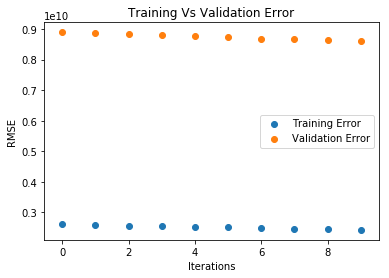

In [132]:
plt.scatter(x=training_rounds,y=eval['validation_0']['rmse'],label='Training Error')
plt.scatter(x=training_rounds,y=eval['validation_1']['rmse'],label='Validation Error')
plt.xlabel('Iterations')
plt.ylabel('RMSE')
plt.title('Training Vs Validation Error')
plt.legend()
plt.show()

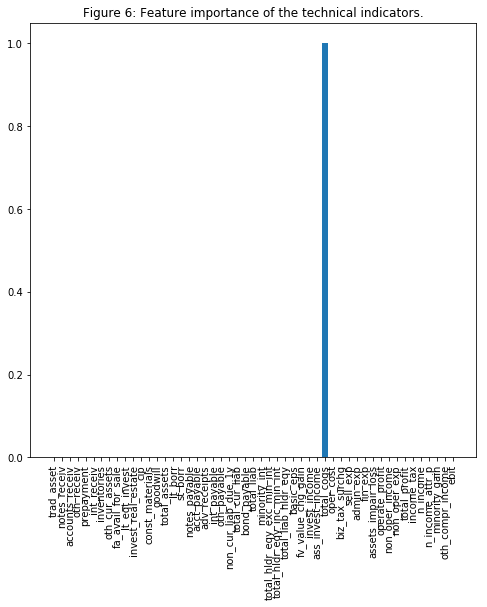

In [134]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(model.feature_importances_))], model.feature_importances_.tolist(), tick_label=x_test879.columns)
plt.title('Figure 6: Feature importance of the technical indicators.')
plt.show()

# plots

In [7]:
pd.set_option('max_columns',None)

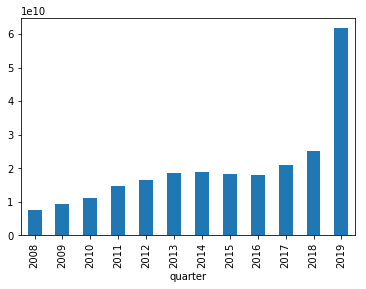

In [20]:
income1['revenue'].resample('Y').mean().plot.bar()